In [58]:
# Data Handling library
import pandas as pd
import numpy as np

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Statistical Analysis & A/B Testing
from scipy import stats
from scipy.stats import beta
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings('ignore')

# Date library
from datetime import datetime, timedelta 

# DATASET 

In [28]:
# Loading of the dataset
data = pd.read_csv("Superstore_Management_System.csv")

data.head(10)

,order_id,order_date,ship_date,customer_name,customer_id,customer_segment,category,product_name,product_id,region,...,sales_amount,cost_price,profit,stock_left,auto_reorder,reorder_quantity,supplier_name,supplier_email,payment_mode,delivery
0,ORD1000,2024-01-20,2024-01-21,Christopher Allen,CUST225,Home Office,Electronics,Keyboard,PROD441,West,...,18335.0,11272.868667,7062.131333,43,No,0,"Lee, Roberts and Jenkins",alexander75@tate.com,Cash,Cancelled
1,ORD1001,2025-08-04,2025-08-06,Christopher Fernandez,CUST794,Consumer,Grocery,Snacks,PROD759,North,...,30763.8,23967.284001,6796.515999,20,No,0,Lopez-Grant,mitchelldavid@vega-howe.net,Net Banking,Pending
2,ORD1002,2024-07-09,2024-07-11,Jonathan Carter,CUST413,Home Office,Electronics,Mouse,PROD372,North,...,6679.8,5113.834279,1565.965721,8,Yes,36,Horn-Medina,xhenry@bush.com,Credit Card,Cancelled
3,ORD1003,2024-11-30,2024-12-02,Amanda Wilson,CUST406,Consumer,Furniture,Dining Table,PROD290,West,...,7879.5,5373.609872,2505.890128,37,No,0,Williams Inc,websterstephanie@vargas.com,Transfer,Pending
4,ORD1004,2025-07-04,2025-07-09,Megan Jimenez,CUST907,Home Office,Furniture,Bookshelf,PROD299,South,...,20345.2,15686.444701,4658.755299,12,No,0,Hopkins Group,jamesrangel@wright.com,Transfer,Pending
5,ORD1005,2022-12-08,2022-12-15,Carly Stein,CUST681,Home Office,Grocery,Juice Pack,PROD216,South,...,37728.0,32331.868395,5396.131605,47,No,0,Evans Inc,kathleenguerrero@montoya.com,Transfer,Cancelled
6,ORD1006,2023-03-03,2023-03-05,William Sanchez,CUST374,Corporate,Office Supplies,Stapler,PROD977,North,...,9184.6,5839.978270,3344.621730,2,Yes,24,Aguilar-Martinez,sking@ortega.com,Transfer,Pending
7,ORD1007,2024-09-14,2024-09-21,Melissa Kramer,CUST708,Home Office,Office Supplies,Stapler,PROD431,East,...,49220.0,41906.721099,7313.278901,21,No,0,"Ruiz, Walter and Campbell",samantha00@rivera-carter.com,Credit Card,Cancelled
8,ORD1008,2025-01-15,2025-01-22,Michael Phillips,CUST129,Corporate,Electronics,Keyboard,PROD538,East,...,21416.4,18291.098941,3125.301059,4,Yes,47,"Alexander, Russell and Diaz",bobbycastro@rice-navarro.info,Credit Card,Cancelled
9,ORD1009,2023-02-22,2023-02-26,Charles Lambert,CUST304,Corporate,Office Supplies,File Folder,PROD977,South,...,14448.0,12847.143475,1600.856525,22,No,0,"Smith, Chandler and Rice",bmacias@jones.net,Credit Card,Cancelled


In [29]:
# Checking the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10000 non-null  object 
 1   order_date        10000 non-null  object 
 2   ship_date         10000 non-null  object 
 3   customer_name     10000 non-null  object 
 4   customer_id       10000 non-null  object 
 5   customer_segment  10000 non-null  object 
 6   category          10000 non-null  object 
 7   product_name      10000 non-null  object 
 8   product_id        10000 non-null  object 
 9   region            10000 non-null  object 
 10  state             10000 non-null  object 
 11  city              10000 non-null  object 
 12  quantity          10000 non-null  int64  
 13  unit_price        10000 non-null  int64  
 14  discount          10000 non-null  int64  
 15  sales_amount      10000 non-null  float64
 16  cost_price        10000 non-null  float64

In [33]:
# Checking null values in the dataset
data.isnull().sum().value_counts()

0    25
Name: count, dtype: int64

In [35]:
# Checking the data description
data.describe()

,quantity,unit_price,discount,sales_amount,cost_price,profit,stock_left,reorder_quantity
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.47440,2543.066500,9.977500,12514.771225,9376.002079,3138.769146,25.266700,6.759200
std,2.88128,1415.122518,7.065195,10343.663875,7887.933682,2938.696611,14.833589,14.390578
min,1.00000,100.000000,0.000000,93.500000,63.932754,12.892657,0.000000,0.000000
25%,3.00000,1323.750000,5.000000,4017.375000,2991.047795,931.215179,12.000000,0.000000
50%,5.00000,2540.000000,10.000000,9566.550000,7042.468380,2197.406114,25.000000,0.000000
75%,8.00000,3765.250000,15.000000,18644.100000,13822.866880,4482.660473,38.000000,0.000000
max,10.00000,4999.000000,20.000000,49630.000000,43023.029553,17572.086482,50.000000,50.000000


In [38]:
# Checking the shape of the dataset
data.shape()

(10000, 25)

In [39]:
# Checking the columns in the dataset
data.columns

Index(['order_id', 'order_date', 'ship_date', 'customer_name', 'customer_id',
       'customer_segment', 'category', 'product_name', 'product_id', 'region',
       'state', 'city', 'quantity', 'unit_price', 'discount', 'sales_amount',
       'cost_price', 'profit', 'stock_left', 'auto_reorder',
       'reorder_quantity', 'supplier_name', 'supplier_email', 'payment_mode',
       'delivery'],
      dtype='object')

In [42]:
# Converting the order_date, ship_date datatype from object to date dataype

data['order_date'] = pd.to_datetime(data['order_date'], format= '%Y-%m-%d')
data['ship_date'] = pd.to_datetime(data['ship_date'], format= '%Y-%m-%d')

# Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          10000 non-null  object        
 1   order_date        10000 non-null  datetime64[ns]
 2   ship_date         10000 non-null  datetime64[ns]
 3   customer_name     10000 non-null  object        
 4   customer_id       10000 non-null  object        
 5   customer_segment  10000 non-null  object        
 6   category          10000 non-null  object        
 7   product_name      10000 non-null  object        
 8   product_id        10000 non-null  object        
 9   region            10000 non-null  object        
 10  state             10000 non-null  object        
 11  city              10000 non-null  object        
 12  quantity          10000 non-null  int64         
 13  unit_price        10000 non-null  int64         
 14  discount          10000

# Feature Engineering 

## A/B Testing

### Does offering a discount increase the average sales amount?

In [43]:
# Creating a binary column for discount presence (1 = discount applied, 0 = no discount)
data['discount_varies'] = data['discount'].apply(lambda x:1 if x>0 else 0)

In [56]:
# Performing a Two-Sample T-Test on Sales Amount by Discount
stats.ttest_ind(
    data[data['discount_varies']==1]['sales_amount'],
    data[data['discount_varies']==0]['sales_amount'],
    # alternative='less',
    alternative='two-sided')

TtestResult(statistic=-5.649752304172877, pvalue=1.6507605019015947e-08, df=9998.0)

T-statistic = -5.65 Negative means the discount group’s average sales amount is lower than the no-discount group.

P-value ≈ 1.65e-08 This is extremely small (essentially zero).

Degrees of freedom = 9998 With such a large sample size, the test is very reliable.

So the conclusion is: Discounts significantly reduce the average sales amount in your dataset.

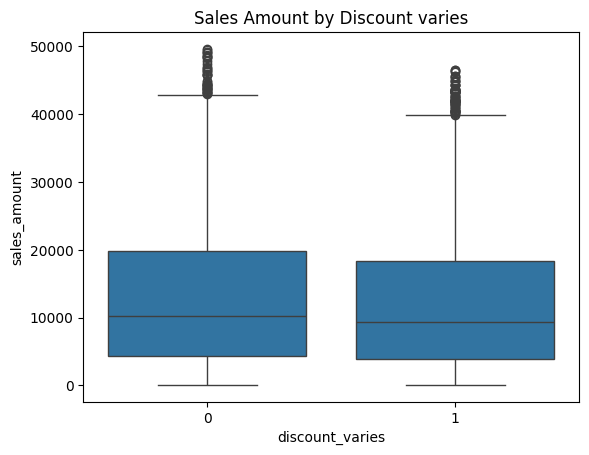

In [57]:
# Visualizing Sales Amount by Discount
# This boxplot shows how sales_amount varies depending on discount_varies.
# Each box represents the distribution (median, quartiles, outliers) of sales_amount
# for a given discount level.

sns.boxplot(x='discount_varies', y='sales_amount', data=data)
plt.title("Sales Amount by Discount varies")
plt.show()

In [84]:
# Building a Linear Regression Model
# Step 1: Define features (X) and target (y)
# Features: discount_varies, quantity
# Target: sales_amount
x = data[['discount_varies','quantity']]
y = data['sales_amount']

# Step 2: Split data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Output model results
# Coefficients show the effect of each feature on sales_amount
# Intercept is the baseline sales when features are zero
# R score shows how well the model explains variance in sales_amount
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", model.score(X_test, y_test))

Coefficient: [-1675.30642036  2297.39678744]
Intercept: 1323.3351951651402
R² score: 0.4008537551293484


### Does faster shipping improve repeat-purchase rate?

In [72]:
# Checking unique customers in my dataset
data['customer_id'].nunique()

900

In [71]:
data['customer_id'].duplicated().value_counts()

customer_id
True     9100
False     900
Name: count, dtype: int64

In [113]:
# Creating a column for data delivery date
data['delivery_days'] = (data['ship_date'] - data['order_date']).dt.days

# Creating a column for fast shipping
# This column flags whether an order was delivered within 2 days.
# If delivery_date <= 2 → fast_shipping = 1 (fast)
# If delivery_date > 2 → fast_shipping = 0 (not fast)
data['fast_shipping'] = (data['delivery_days'] <=2).astype(int)

In [114]:
# We want to create a repeat purchase column
# Identifying customers with repeat purchases (1 = repeat, 0 = single purchase)
# Step 1: Count number of orders per customer
repeat_data = data.groupby('customer_id')['order_id'].count()

# Step 2: Create a binary column
# If a customer has more than 10 orders → 1 (repeat purchase) Otherwise → 0 (not repeat purchase)
# i.e I used 10 orders because most of my customers have repeated orders(1,2,3) which makes the logistic regression fail because there is no variationto learn from
data['repeat_purchase'] = data['customer_id'].map(lambda x:1 if repeat_data[x]>10 else 0)

In [115]:
# We want to run the model using logistic regression
# repeat purchase - dependent variable
# fast shipping - independent variable

x = sm.add_constant(data['fast_shipping'])
y = data['repeat_purchase']

log_model = sm.Logit(y, x)
result = log_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.626688
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        repeat_purchase   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:               0.0002888
Time:                        07:33:51   Log-Likelihood:                -6266.9
converged:                       True   LL-Null:                       -6268.7
Covariance Type:            nonrobust   LLR p-value:                   0.05706
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7796      0.025     30.646      0.000       0.730       0.829
fast_shipping    -0.

Based on logistic regression (n = 10,000 orders), fast shipping does not significantly influence customer repeat-purchase behavior (p = 0.057). Although the coefficient is negative, the effect size is negligible. This suggests that customer loyalty may be driven more by product category, pricing, and customer segment rather than delivery speed

In [116]:
# Based on my findings:
# Initially, fast_shipping showed a small negative coefficient, suggesting faster shipping may slightly reduce repeat purchases,
# but the effect was not statistically significant.
# Therefore, I extended the model to a multivariate logistic regression including sales_amount, discount, and delivery_days
# to provide additional explanatory power, though their significance depends on the dataset distribution.
X = data[['fast_shipping', 'sales_amount',  'discount', 'delivery_days']]
X = sm.add_constant(X)
y = data['repeat_purchase']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.626614
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        repeat_purchase   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Dec 2025   Pseudo R-squ.:               0.0004073
Time:                        07:33:55   Log-Likelihood:                -6266.1
converged:                       True   LL-Null:                       -6268.7
Covariance Type:            nonrobust   LLR p-value:                    0.2766
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8014      0.100      7.975      0.000       0.604       0.998
fast_shipping    -0.

The multivariate logistic regression analysis indicates that operational factors such as shipping speed, delivery duration, discounts, and order value do not significantly influence repeat-purchase behavior in this dataset.

Customer retention appears to be unrelated to these transactional attributes, suggesting that loyalty is likely driven by factors such as product satisfaction, customer experience, brand affinity, or customer segment behaviors

## Principal Component Analysis (PCA)

### Hidden patterns for Sales Behaviour

In [130]:
# Convert the null and string values to numeric
data['quantity'] = pd.to_numeric(data['quantity'], errors= 'coerce')
data['unit_price'] = pd.to_numeric(data['unit_price'], errors= 'coerce')

        PC1       PC2       PC3
0  1.360346 -0.994661 -1.223614
1  3.177674 -0.768816  0.145414
2 -1.133511 -0.433313 -0.673166
3 -0.822295 -0.677807  0.714017
4  1.414133 -0.263447  0.174648

Explained Variance Ratio:
PC1: 52.20%
PC2: 14.48%
PC3: 14.35%


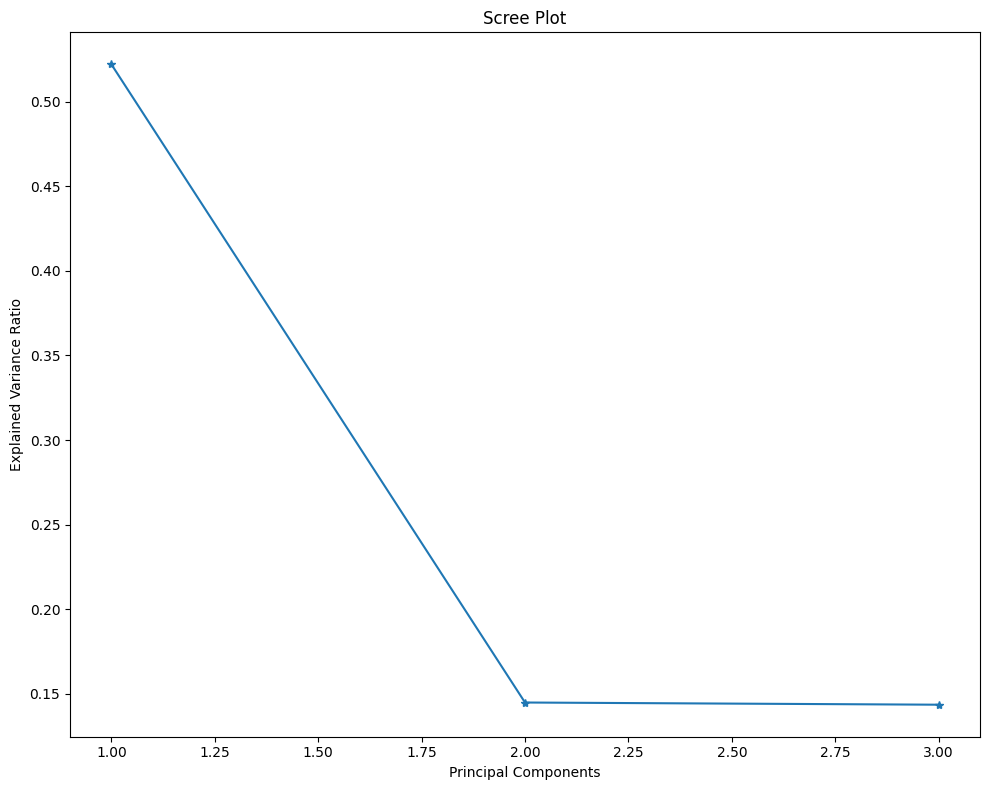

In [148]:
# Selecting Numeric columns within the data fro the analysis

numeric_data = [ 'quantity', 'unit_price', 'discount', 'sales_amount', 'cost_price', 'profit', 'delivery_days']
x = data[numeric_data]  

# Standardizing the Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x_scaled)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())

# Checking the explained variance
explained_var = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var*100:.2f}%")

# Visualing the PCA findings of my data
plt.figure(figsize=(10, 8))
plt.plot(range(1, 4), explained_var, marker='*')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid = True
plt.tight_layout()
plt.show()

The principal component analysis indicates that the majority of variance in the dataset is captured by the first component (PC1), which explains 52.20% of the variability. The second and third components (PC2 and PC3) contribute 14.48% and 14.35% respectively, highlighting that while multiple dimensions exist, most of the data’s structure is concentrated in the first axis.

This suggests that customer behavior and transactional attributes can largely be summarized along a single dominant factor, with smaller contributions from secondary dimensions. The findings imply that underlying drivers of variation are not evenly distributed across all variables, and loyalty or repeat-purchase behavior is likely shaped by broader latent factors such as product satisfaction, customer experience, brand affinity, or customer segment differences rather than isolated transactional measures.

# SEGMENTATION & CLUSTERING ANALYSIS

## The process of grouping similar customers or products based on shared characteristics

### Customer segmentation using KMeans Clustering

In [149]:
# Aggregation of customer-level features to be used for the analysis

customer_data = data.groupby('customer_id').agg({
    'sales_amount': 'sum',
    'discount': 'mean',
    'order_id':'count',
    'quantity': 'sum'
}).rename(columns={
    'sales_amount': 'total_spent',
    'discount': 'avg_discount',
    'order_id': 'purchase_frequency',
    'quantity': 'total_quantity'
})
print(customer_data.head())

             total_spent  avg_discount  purchase_frequency  total_quantity
customer_id                                                               
CUST100         91620.45     12.777778                   9            49.0
CUST101         63284.00     10.000000                   6            43.0
CUST102         70917.05      6.428571                   7            35.0
CUST103         90592.65      8.500000                  10            50.0
CUST104        156307.00      9.583333                  12            70.0


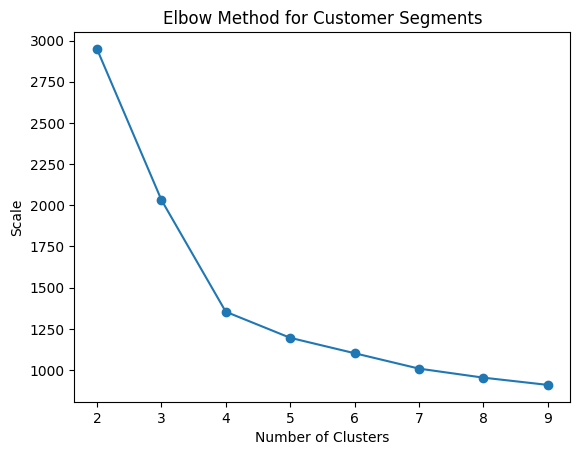

             total_spent  avg_discount  purchase_frequency  total_quantity  \
customer_id                                                                  
CUST100         91620.45     12.777778                   9            49.0   
CUST101         63284.00     10.000000                   6            43.0   
CUST102         70917.05      6.428571                   7            35.0   
CUST103         90592.65      8.500000                  10            50.0   
CUST104        156307.00      9.583333                  12            70.0   
CUST105         91915.60     13.500000                  10            56.0   
CUST106        172378.60     12.083333                  12            64.0   
CUST107         12804.05     11.666667                   3            10.0   
CUST108        207169.90     11.153846                  13            73.0   
CUST109        202274.15     10.000000                  14            86.0   

             cluster  
customer_id           
CUST100          

In [153]:
# standardizing the featuers columns used
scaler = StandardScaler()
scaled_customer = scaler.fit_transform(customer_data)

# Finding Optimal number of clusters(Elbow method)
scale = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_customer)
    scale.append(km.inertia_)

plt.plot(range(2, 10), scale, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel('Scale')
plt.title("Elbow Method for Customer Segments")
plt.show()

# Train Final Model (Assume 4 clusters from elbow)
kmeans_cust = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans_cust.fit_predict(scaled_customer)

print(customer_data.head(10))

Customer retention and revenue growth should focus on segment-specific strategies:

Cluster 0 (high spenders) → Reward loyalty with exclusive perks, personalized engagement, and premium services.

Cluster 1 (steady buyers) → Encourage frequency with bundles, subscriptions, and targeted upselling to grow value.

Cluster 2 (frequent high-volume buyers) → Support with bulk offers, priority service, and account management, while balancing margins.

Cluster 3 (discount-sensitive high spenders) → Maintain loyalty with promotions, but carefully manage discounts to protect profitability.

Overall, spending and frequency vary more by customer segment than by discount level, meaning loyalty is likely driven by customer experience, product satisfaction, and segment behaviors rather than transactional discounts alone.

### Product segmentation using KMeans Clustering

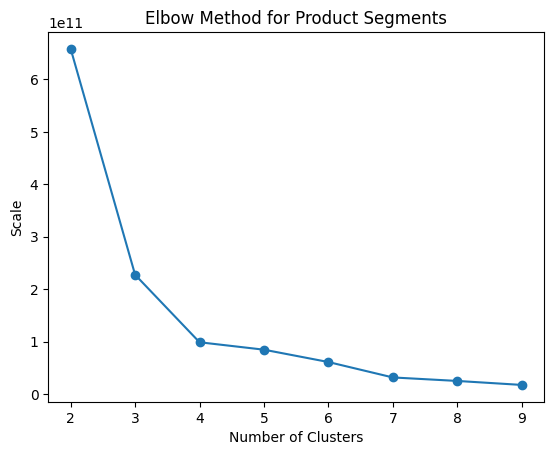

              total_sales  total_profit  total_quantity    avg_price  cluster
product_name                                                                 
Bookshelf      6350596.10  1.624266e+06          2780.0  2553.840491        0
Calculator     6398848.95  1.572338e+06          2734.0  2599.342742        2
Cooking Oil    6359947.20  1.582716e+06          2831.0  2461.883065        0
Dining Table   6207771.80  1.564036e+06          2824.0  2458.813953        3
File Folder    6098221.90  1.534417e+06          2742.0  2539.380282        3
Headphones     5659425.25  1.430073e+06          2525.0  2477.097046        1
Juice Pack     6504355.95  1.624168e+06          2710.0  2628.656746        2
Keyboard       6268715.10  1.597423e+06          2806.0  2532.050467        0
Laptop         6086533.90  1.453242e+06          2698.0  2468.572597        3
Monitor        6241783.00  1.571278e+06          2726.0  2526.506173        0
Mouse          5914528.95  1.510703e+06          2602.0  2555.64

In [165]:
# Aggregation of product-level features to be used for the analysis

product_data = data.groupby('product_name').agg({
    'sales_amount': 'sum',
    'profit': 'sum',
    'quantity': 'sum',
    'unit_price': 'mean'
}).rename(columns={
    'sales_amount': 'total_sales',
    'profit': 'total_profit',
    'quantity': 'total_quantity',
    'unit_price': 'avg_price'})

scaler = StandardScaler()
scaler_product = scaler.fit_transform(product_data)

scale = []
for k in range(2, 10):
    km = KMeans(n_clusters = k, random_state=42)
    km.fit(product_data)
    scale.append(km.inertia_)
    
plt.plot(range(2, 10), scale, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel('Scale')
plt.title("Elbow Method for Product Segments")
plt.show()

# Train Final Model (Assume 4 clusters from elbow)
kmeans_prod = KMeans(n_clusters=4, random_state=42)
product_data['cluster'] = kmeans_prod.fit_predict(scaler_product)

print(product_data.head(25))

The elbow method for product segmentation reveals that the optimal number of clusters is 4, where the rate of improvement in clustering performance sharply declines. This indicates that segmenting products into four distinct groups captures the most meaningful variation in product behavior.

Cluster-specific strategies:

Cluster 0 (core performers) → Products with balanced sales, profit, and quantity. These are reliable revenue drivers and should be prioritized for consistent availability and operational efficiency.

Cluster 1 (margin-sensitive mid-tier) → Products with moderate sales and lower profitability. These require margin improvement through pricing adjustments, bundling, or cost control.

Cluster 2 (premium high-value) → Products with strong sales, high average prices, and robust profit margins. These are ideal for premium positioning, brand differentiation, and loyalty campaigns.

Cluster 3 (competitive but margin-sensitive) → Products with competitive sales but thinner margins. Focus on cost optimization and selective promotions to sustain profitability.

Overall, product performance varies more by behavioral cluster than by individual metrics like price or volume. Strategic decisions should be driven by cluster behavior to maximize profitability and customer alignment.



### Thank you